<a href="https://colab.research.google.com/github/mihirsahu-office/training/blob/branch-0.1/machine-learning/Udacity-FirstModel-Cel-Fah-Conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#IMPORT DEPENDENCIES
import tensorflow as tf
import numpy as np
import logging

In [ ]:
#SET UP TRAINING DATA
#Feature — The input(s) to our model. In this case, a single value — the degrees in Celsius.
#Labels — The output our model predicts. In this case, a single value — the degrees in Fahrenheit.
#Example — A pair of inputs/outputs used during training. 
#In our case a pair of values from celsius_q and fahrenheit_a at a specific index, such as (22,72).
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)
for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

In [3]:
# BUILD LAYER
#input_shape=[1] — This specifies that the input to this layer is single value
#units=1 — This specifies the number of neurons in the layer. 
l0 = tf.keras.layers.Dense(units=1, input_shape=[1]) 

In [4]:
# ASSEMBLE LAYERS INTO MODEL
#This is a Model which encapsulates the layer.  Here model has single layer

model = tf.keras.Sequential([l0])

In [7]:
#COMPILE THE MODEL WITH LOSS AND OPTIMIZER FUNCTIONS
#Loss function — A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".)
#Optimizer function — A way of adjusting internal values in order to reduce the loss.
#mean squared error- is standard Loss function for simple models
#Optimizer function - is standard optimizer function for simple models
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [9]:
#TRAIN MODEL
#Train the model by calling the fit method.

history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


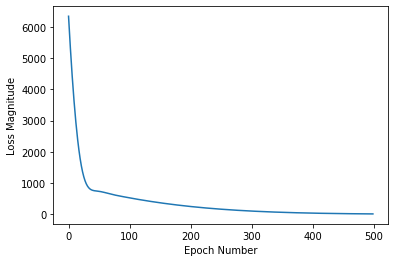

In [10]:
#DISPLAY TRAINING STATISTICS
# Matplotlib to visualize this.
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [11]:
# PREDICT USING MODEL
print(model.predict([102.0]))

[[214.94461]]


In [12]:
# LOOKING INTO LAYERS FOR WEIGHT
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.8269413]], dtype=float32), array([28.596596], dtype=float32)]


In [13]:
#TRYING WITH MORE VARIABLES
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[211.7474]]
Model predicts that 100 degrees Celsius is: [[211.7474]] degrees Fahrenheit
These are the l0 variables: [array([[-0.11905264,  0.06590624,  0.633121  , -0.49436837]],
      dtype=float32), array([-2.6443937, -2.5001807,  2.6243815, -2.7980592], dtype=float32)]
These are the l1 variables: [array([[ 0.03087137, -0.9371899 , -0.5370364 ,  0.59567875],
       [-0.33657515, -1.2324603 , -0.8352609 ,  0.31236738],
       [-0.7752913 ,  0.51612586, -0.11369096, -0.54879993],
       [-0.5159327 , -0.8959234 , -0.8582004 ,  0.3455429 ]],
      dtype=float32), array([-2.2690132,  2.7587516,  2.704156 , -2.7315507], dtype=float32)]
These are the l2 variables: [array([[-0.4775646 ],
       [ 0.8763297 ],
       [ 1.3303281 ],
       [-0.86424536]], dtype=float32), array([2.7362826], dtype=float32)]
